# Difusión de Fotones en el Sol

Se tiene que la velocidad de los fotones de rayos X en el Sol se desplazan con un camino libre medio de $l=5\times 10^{-5}\textrm{ [m]}$, a una velocidad de $c$. Para realizar el camino aleatorio, es necesario escoger distintas direcciones de forma aleatoria y que el desplazamiento total sea de $l$.

## Pseudocódigo

1. Se toma una posición inicial de r=0 y un contador n=0. Se toma el valor de $l$ del paso y se multiplica por un factor $k$.
2. Se generan 3 componentes de un vector y se calcula la magnitud de este para obtener un vector unitario $\hat{\textbf{r}}=\hat{\textbf{x}}+\hat{\textbf{y}}+\hat{\textbf{z}}$, este luego se multiplicacará por $l_{1}$ para que el desplazamiento sea de esta magnitud.
3. Una vez se realizó el paso 2, se le suma una unidad al contador, n=n+1.
4. Se calcula la raíz cuadrática media de la distancia. Si esta es mayor o igual a $R=5\times 10^{8}\textrm{ [m]}$, entonces se detiene el procedimiento, sino, se repite desde el paso 2.
5. Una vez que se alcanza el valor de $R_{sol}$, se estima el valor de la cantidad de pasos $N$ buscada como $N\approx k^2\cdot n$. Esta expresión fue obtenida de forma empírica luego de realizar la simulación varias veces.

In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Código

In [2]:
l=5e-5
Rsol=5e8
c=299792458
k=10e9
kEnsayos=5

In [3]:
def CaminoLibreSol(k):
    """
    Función que genera un camino libre en tomando un desplazamiento de longitud l*k. Cuenta el número de pasos de esta longitud
    que permiten obtener un desplazamiento cuadrado medio de un radio de Rsol.
    
    Parámetros de entrada:
    -----------------------
    k: factor por el que se multiplica l.
    Rsol: radio que se desea alcanzar.
    
    Salidas:
    -----------------------
    R: radio total recorrido.
    N: número de pasos de longitud l que se realizaron.
    posiciones: arreglo con las posiones tridimensionales del fotón para los N/k pasos.
    """
    n=0 # contador de pasos
    R=0 # raíz cuadrada media de la distancia radial
    l1=l*k # cantidad de pasos de longitud l que se dan por paso n
    posiciones=[] # almacena el vector posición de la partícula en cada punto
    posición_anterior=np.array([0,0,0]) # almacena la posición anterior
    while R<Rsol:
        n+=1 # se suma un paso
        rd.seed(rd.uniform(10**4,10**8)) # semilla aleatoria en cada paso
        x,y,z=rd.gauss(0,2),rd.gauss(0,2),rd.gauss(0,2) # vector posición aleatorio
        r=np.array([x,y,z]) # se almacena en un vector r
        r=r/np.sqrt((r**2).sum()) # se hace unitario
        r=r*l1 # se multiplica por la magnitud del paso a dar
        nueva_posición=r+posición_anterior.copy() # se suma el paso a la posición anterior
        posiciones.append(nueva_posición.copy()) # se almacena la posición
        R2=(nueva_posición.copy()**2).sum() # se calcula el cuadrado medio de la distancia
        R=np.sqrt(R2) # se calcula la raíz cuadrada media
        posición_anterior=nueva_posición.copy() # la nueva posición pasa a ser la posición anterior
    N=k**2*n # se calcula el total de pasos de longitud l que se dieron
    return R,N,np.array(posiciones)

Se observa que el valor de $N$ es cercano al valor teórico que viene dado por:

$$N=\left(\frac{R_{sol}}{l}\right)^2=1\times10^{26}$$

Como se dan $n$ pasos de longitud $k\cdot l$, se tiene que , aplicando la fórmula anterior, se darían:

$$n_0=\left(\frac{k\cdot l}{l}\right)^2=k^2$$

Donde $n_0$ corresponde a la cantidad de pasos de longitud $l$ que se deben dar para alcanzar $k\cdot l$. De esta forma, se puede obtener la expresión:

$$N\approx k^2 n$$

In [4]:
R,N,posiciones=CaminoLibreSol(k)
R,N

(500067502.9378701, 5.331516e+26)

In [5]:
posiciones

array([[-1.27544960e+05,  3.88974171e+05, -2.87108651e+05],
       [-3.07317927e+05,  1.53907252e+05, -6.90128779e+05],
       [ 8.11646095e+04, -1.28321172e+05, -8.29514700e+05],
       ...,
       [ 3.40358796e+08,  2.69064915e+08, -2.47880573e+08],
       [ 3.40737538e+08,  2.69173743e+08, -2.47572822e+08],
       [ 3.40673742e+08,  2.69669551e+08, -2.47562603e+08]])

In [6]:
def PromedioPasosSol(k):
    """
    Función que calcula el promedio del número de pasos de longitud l que realiza el fotón para una muestra aleatoria entre
    5 y 10 corridas de la función CaminoLibreSol.
    
    Parámetros de entrada:
    -----------------------
    k: factor que multiplica l.
    
    Salidas:
    -----------------------
    pasos: número promedio de pasos.
    """
    nIter=0 # contador de iteraciones
    pasos=0 # sumador de pasos por ensayo
    while nIter<kEnsayos:
        nIter+=1
        _,N,_=CaminoLibreSol(k) # calcula los pasos
        pasos+=N # suma los pasos
    pasos/=kEnsayos # calcula el promedio de pasos
    return pasos

Ahora, el promedio obtenido de correr la simulación $5$ veces es cercano al valor calculado, de forma que se confirma que se puede estimar $N$ como:

$$N\approx k^2\cdot n$$

Donde $k$ es el factor que multiplica la longitud $l$ del paso que se deseaba realizar y $n$ la cantidad de pasos de longitud $k\cdot l$ que se dieron.

In [7]:
pasos=PromedioPasosSol(k)
pasos

1.0194544e+26

In [8]:
# se calcula el tiempo en segundos y luego el tiempo en años
tiempo_segundos=pasos*l/c
tiempo_años=tiempo_segundos/(60*60*24*365)

Se observa que el valor en años es sumamente alto, de forma que si se recorriera la simulación sin utilizar la aproximación de los pasos que se está utilizando no se lograría alcanzar el resultado buscado con la capacidad computacional que se posee.

In [9]:
tiempo_segundos,tiempo_años

(17002669226588.75, 539151.1043438847)

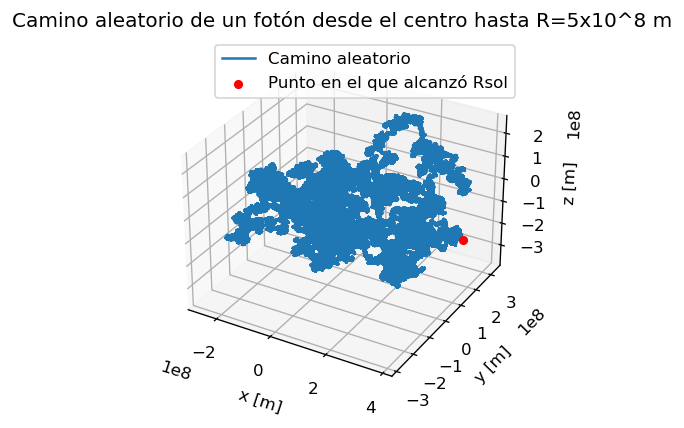

In [10]:
# Se grafica el camino aleatorio y el punto en el que el fotón alcanza Rsol
fig = plt.figure(dpi=120)
ax=fig.add_subplot(111, projection='3d')
Axes3D.plot(ax,xs=posiciones[:,0],ys=posiciones[:,1],zs=posiciones[:,2])
Axes3D.scatter(ax,xs=posiciones[-1,0],ys=posiciones[-1,1],zs=posiciones[-1,2],color='red')
plt.legend(['Camino aleatorio','Punto en el que alcanzó Rsol'])
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
ax.set_title('Camino aleatorio de un fotón desde el centro hasta R=5x10^8 m')
plt.show()

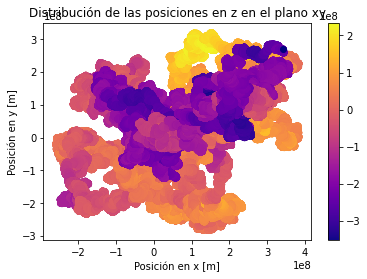

In [11]:
# Se hace un gráfico de contorno para conocer la forma en la que se distribuye el eje z en el plano xy
plt.scatter(posiciones[:,0],posiciones[:,1],c=posiciones[:,2],cmap='plasma')
plt.colorbar()
plt.scatter(posiciones[-1,0],posiciones[-1,1],c=posiciones[-1,2],cmap='jet')
plt.xlabel('Posición en x [m]')
plt.ylabel('Posición en y [m]')
plt.title('Distribución de las posiciones en z en el plano xy')
plt.show()

## Análisis

En la primera gráfica se muestra en rojo el punto en el que el fotón alcanza una distancia de $R=5\times 10^8 [m]$, en la segunda se muestra en azul oscuro. Si esto representa un fractal o no, está discutible, tal vez dependerá de cosas como la distribución que siguen los números aleatorios con que se generan las posiciones. Sin embargo, a simple vista parece que sí, en la segunda gráfica, viendo la forma en la que se distribuyen los valores de $z$ para el plano $xy$, se puede ver que las posiciones sí parecen formar un fractal.

# Simulación de Metrópolis Monte Carlo con el Modelo de Ising 1D

## Pseudocódigo

1. Se crean tres estados iniciales:
    
    a. Positivo: todos los espines son positivos.
    
    b. Negativo: todos los espines son negativos.
    
    c. Aleatorio: los espines se distribuyen de forma aleatoria.

2. A cada estado se le calculan su energía, magnetización y calor específico para cada temperatura en un rango de $0<\textrm{kT}\leq \textrm{kT}_f$
    
    a. Se realizan kEnsayos, para cada uno se promedia la energía y la magnetización obtenida en un rango desde la mitad de los valores de la energía en el tiempo.
    
    b. Se elevan los promedios de las energías obtenidas al cuadrado y se promedia para obtener el promedio del cuadrado de la energía.

3. Se almacena cada valor de temperatura, energía, magnetización y calor específico para cada valor de temperatura.

4. Se retornan los arreglos.

## Código

In [12]:
nPasos=3000
kT=5
N=100
J=1
B=0
kEnsayos=5
kTf=5

In [13]:
def Estado(N):
    """
    Función que crea un estado unidimensional de N espines aleatorios.
    
    Parámetros de entrada:
    ----------------------
    N: número de espines aleatorios a crear.
    
    Salida:
    ----------------------
    estado: arreglo de N espines.
    """
    estado=np.zeros(N) # arreglo unidimensional de N ceros
    for i in range(N):
        if np.random.random()<=0.5: # se toma una probabilidad del 50%
            estado[i]=1 # estados positivos
        else:
            estado[i]=-1 # estados negativos
    return estado

In [14]:
def EnergíaEstado(B,J,estado):
    """
    Función que calcula la energía y la magnetización de un estado unidimensional de N espines.
    
    Parámetros de entrada:
    ----------------------
    B: campo magnético.
    J: energía de intercambio.
    estado: estado al que se le desea calcular la energía
    
    Salidas:
    ----------------------
    energía: energía del estado
    magnetización: magnetización del estado
    """
    Mb=9.274009994E-24 # magnetón de Bohr
    energía=0 # sumador de la energía
    for i in range(len(estado)-1):
        energía+=-J*estado[i]*estado[i+1] # se realiza la primera suma
    for j in range(len(estado)):
        energía+=-Mb*(B*estado[j]) # se realiza la segunda suma
    magnetización=estado.sum() # se calcula la magnetización
    return energía,magnetización

In [15]:
def IsingMetrópolis(kT,N,J,B,nPasos,estado_inicial):
    """
    Función que calcula la evolución temporal probabilística de un estado siguiendo el algoritmo de Metrópolis.
    
    Parámetros de entrada:
    ----------------------
    kT: temperatura del estado en kT.
    N: número de espines.
    J: energía de intercambio.
    B: campo magnético.
    nPasos: número de pasos temporales.
    estado_inicial: estado inicial con el que se realizará la simulación.
    
    Salidas:
    ----------------------
    energías: arreglo con las energías calculadas en cada paso.
    estados: arreglo con los arreglos de los estados en cada paso.
    magnetizaciones: arreglo con las magnetizaciones calculadas en cada paso.
    """
    energías=[] # almacenar energías
    estados=[estado_inicial.copy()] # almacenar estados
    valorE,valorM=EnergíaEstado(B,J,estado_inicial.copy()) #calcula los valores de la enegía y la magnetización del estado
    magnetización=[] # almacenar magnetizaciones
    for k in range(nPasos-1):
        _,valorM=EnergíaEstado(B,J,estado_inicial.copy()) # se recalcula el valor de la magnetización
        magnetización.append(valorM) # se almacena el valor calculado
        estado=estado_inicial.copy() # se crea el estado al que se le medirá su alteración
        iPart = np.random.randint(N) # se toma un espín aleatorio
        if np.random.random()<0.5: #probabilidad del 50%
            s=-1 # cambio de signo del espín
            estado[iPart]*=s
            nueva_energía=EnergíaEstado(B,J,estado.copy())[0] # se calcula la nueva enegía
            dE=nueva_energía-valorE # se calcula el cambio en la energía
        else:
            s=1 # el espín conserva su estado
            estado[iPart]*=s
            nueva_energía=EnergíaEstado(B,J,estado.copy())[0] # se calcula la energía
            dE=nueva_energía-valorE # se calcula el cambio en la energía
        
        if dE>0: # para un cambio de energía positivo
            if np.random.random() < np.exp(-dE/kT): #criterio de aceptación
                estado_inicial[iPart]*=s # cambio del estado
                valorE+=dE # cambio de la energía
            else:
                estado_inicial[iPart]*=1 # se conserva el estado
                valorE+=0 # no hay cambio en la energía
        else: # si el cambio es menor o igual a cero
            estado_inicial[iPart]*=s # cambio del estado
            valorE+=dE # cambio de la energía
        estados.append(estado_inicial.copy()) # se almacena el estado
        energías.append(EnergíaEstado(B,J,estado_inicial.copy())[0]) # se almacena la energía
    return np.asarray(energías),np.asarray(estados),np.asarray(magnetización)

In [16]:
def PromedioEnergíaMagnetización(kT,N,J,B,nPasos,kEnsayos,estado_inicial):
    """
    Función que calcula el promedio de la energía, el de la magnetización y el del cuadrado de la energía para un estado
    relajado a una temperatura kT.
    
    Parámetros de entrada:
    ----------------------
    kT: temperatura de equilibrio.
    N: cantidad de espines en el sistema.
    J: energía de intercambio.
    B: campo magnético.
    nPasos: número de pasos.
    kEnsayos: número de ensayos para cada valor de kT.
    estado_inicial: estado inicial que se va a utilizar.
    
    Salidas:
    ----------------------
    energía: promedio de la energía para la temperatura kT en los kEnsayos.
    magnetización: promedio de la magnetización para la temperatura kT en los kEnsayos.
    energía^2: promedio del cuadrado de las energías para la temperatura kT en los kEnsayos.
    """
    k=0 # contador de ensayos
    energías=[] # almacena energías promedio
    magnetizaciones=[] #almacena magnetizaciones promedio
    while k<kEnsayos:
        k+=1 # ensayo
        iEnergías,_,iMagnetizaciones=IsingMetrópolis(kT,N,J,B,nPasos,estado_inicial) # calcula las energías y las magnetizaciones para la temperatura kT
        energías.append(iEnergías[int(len(iEnergías)/2):].mean()) # almacena el promedio de la energía
        magnetizaciones.append(iMagnetizaciones[int(len(iMagnetizaciones)/2):].mean()) # almacena el promedio de la magnetización
    return np.array(energías).mean(),np.array(magnetizaciones).mean(),(np.array(energías)**2).mean()

In [17]:
PromedioEnergíaMagnetización(kT,N,J,B,nPasos,kEnsayos,Estado(N))

(-18.0296, -1.5293333333333332, 327.67981191111113)

In [18]:
def Simulaciones(kTf,N,J,B,nPasos,kEnsayos):
    """
    Función que calcula las energías, magnetizaciones y calores específicos para distintos valores de temperatura kT en el rango
    0<kT<=kTf para tres estados iniciales distintos.
    
    Parámetros de entrada:
    ----------------------
    kTf: temperatura final de equilibrio.
    N: cantidad de espines en el sistema.
    J: energía de intercambio.
    B: campo magnético.
    nPasos: número de pasos.
    kEnsayos: número de ensayos para cada valor de kT.
    
    Salidas:
    ----------------------
    temperaturas: arreglo con arreglos de las temperaturas para tres sistemas con estado inicial distinto.
    energías: arreglo con arreglos de las energías para cada temperatura para tres sistemas con estado inicial distinto.
    magnetizaciones: arreglo con arreglos de las magnetizaciones para cada temperatura para tres sistemas con estado inicial distinto.
    calores_específicos: arreglo con arreglos de los calores específicos para cada temperatura para tres sistemas con estado inicial distinto.
    """
    inicial_positivo=np.ones(N) # estado inicial positivo
    inicial_negativo=-1*np.ones(N) # estado inicial negativo
    inicial_aleatorio=Estado(N) # estado inicial aleatorio
    estados=np.array([inicial_positivo,inicial_negativo,inicial_aleatorio]) # arreglo de los estados
    energías=[] # almacena las energías para cada temperatura para cada estado inicial
    magnetizaciones=[] # almacena las magnetizaciones para cada temperatura para cada estado inicial
    calores_específicos=[] # almacena los calores específicos para cada temperatura para cada estado inicial
    temperaturas=[]
    for iEstado in estados: # toma un estado inicial
        kT=0.01 # temperatura inicial a evaluar
        iEnergías=[] # almacena las energías promedio para la temperatura kT conforme esta cambia para cada estado inicial
        iMagnetizaciones=[] # almacena las magnetizaciones promedio para la temperatura kT conforme esta cambia para cada estado inicial
        iCalores_específicos=[] # almacena los calores específicos promedio para la temperatura kT conforme esta cambia para cada estado inicial
        kTs=[] # almacena las temperaturas para cada estado inicial
        while kT<kTf: # evolución de la temperatura
            jEnergía,jMagnetización,jEnergíaCuadrada=PromedioEnergíaMagnetización(kT,N,J,B,nPasos,kEnsayos,iEstado) # calcula la energía, magnetización y cuadrado medio de la energía para el estado
            iEnergías.append(jEnergía) # almacena energía
            iMagnetizaciones.append(jMagnetización) # almacena magnetización
            iCalores_específicos.append((jEnergíaCuadrada-jEnergía**2)/(kT**2*N**2)) # almacena calor específico
            kTs.append(kT) # almacena temperatura
            kT+=0.1 # aumenta la temperatura en 0.1
        temperaturas.append(kTs) # almacena las temperaturas para el estado inicial
        energías.append(iEnergías) # almacena las enegías
        magnetizaciones.append(iMagnetizaciones) # almacena las magnetizaciones
        calores_específicos.append(iCalores_específicos) # almacena los calores específicos
    calores_específicos[2][0]=0
    return temperaturas,energías,magnetizaciones,calores_específicos

In [19]:
temperaturas,energías,magnetizaciones,calores_específicos=Simulaciones(kTf,N,J,B,nPasos,kEnsayos)

In [20]:
def Analítica(J,B,kT,N):
    """
    Función que calcula los valores analíticos de la magnetización, energía interna y calor específica.
    
    Parámetros de entrada:
    ----------------------
    J: energía de intercambio
    B: campo magnético
    kT: temperatura
    N: número de espines   
    
    Salidas:
    ----------------------
    E: energía interna
    M: magnetizaciones
    C: calores específicos
    """
    p=J/kT
    E=-N*J*np.tanh(p)
    C=(p)*2/np.cosh(p)*2
    M=(N*np.exp(p)*np.sinh(B/kT))/(np.sqrt(np.exp(2*p)*np.sinh(B/kT)*2+np.exp(-2*p)))
    
    return E, M, C

In [21]:
E,M,C=Analítica(J,B,np.array(temperaturas[0]),N)

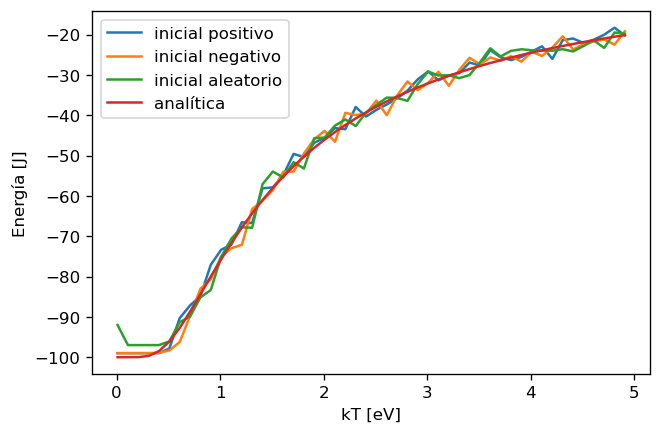

In [22]:
plt.figure(dpi=120)
plt.plot(temperaturas[0],energías[0])
plt.plot(temperaturas[1],energías[1])
plt.plot(temperaturas[2],energías[2])
plt.plot(temperaturas[0],E)
plt.legend(['inicial positivo','inicial negativo','inicial aleatorio','analítica'])
plt.xlabel('kT [eV]')
plt.ylabel('Energía [J]')
plt.show()

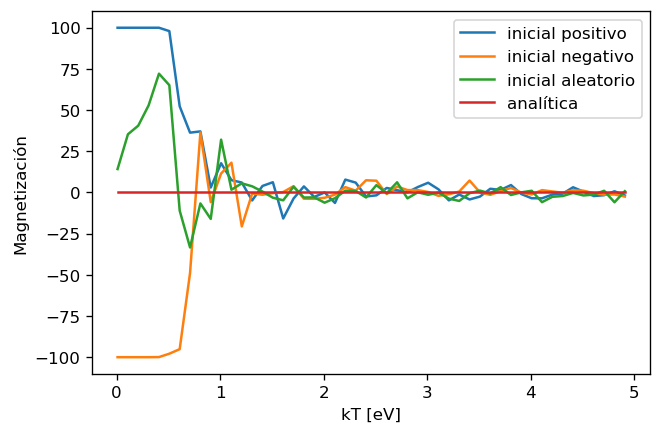

In [23]:
plt.figure(dpi=120)
plt.plot(temperaturas[0],magnetizaciones[0])
plt.plot(temperaturas[1],magnetizaciones[1])
plt.plot(temperaturas[2],magnetizaciones[2])
plt.plot(temperaturas[0],M)
plt.legend(['inicial positivo','inicial negativo','inicial aleatorio','analítica'])
plt.xlabel('kT [eV]')
plt.ylabel('Magnetización')
plt.show()

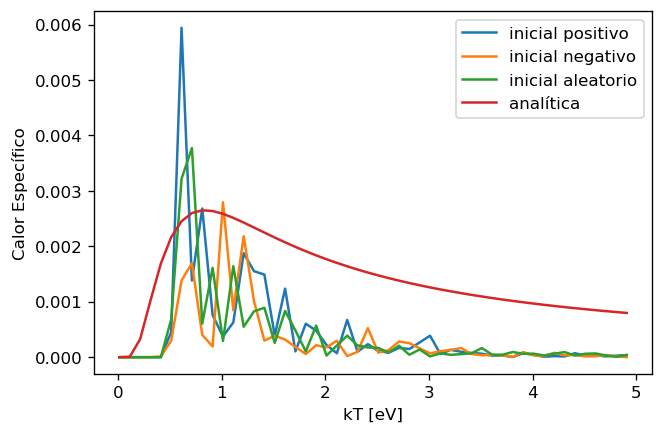

In [24]:
plt.figure(dpi=120)
plt.plot(temperaturas[0],np.array(calores_específicos[0]))
plt.plot(temperaturas[1],np.array(calores_específicos[1]))
plt.plot(temperaturas[2],np.array(calores_específicos[2]))
plt.plot(temperaturas[0],C/(N*10))
plt.legend(['inicial positivo','inicial negativo','inicial aleatorio','analítica'])
plt.xlabel('kT [eV]')
plt.ylabel('Calor Específico')
plt.show()

## Análisis

1. Gráfica 1:
    Para comparar con los resultados analíticos se toma como referencia lo suministrado en la ecuación $5.7$ del libro de texto en 1 para la energía, en la que se observa que para las gráficas obtenidas la energía en efecto tiende a 0 conforme la temperatura tiende a infinito; además, se cumple que tiende a N cuando la temperatura tiende a cero, tal y como se observa del modelo analítico.

2. Gráfica 2:
    En cuando a la gráfica de la magnetización, se observa cómo decrece de "golpe" conforme aumenta la temperatura, para un estado inicial positivo, mientras que crece de "golpe" para el estado inicial negativo, lo cual es lo que debe cumplirse según el libro de texto en 1, en ambos casos tiende a cero rápidamente, lo que hace que se acerque al modelo analítico.
    
3. Gráfica 3:
    Por último, en cuanto al calor específico, se observa que el comportamiento obtenido es el esperado de acuerdo con el libro 1; sin embargo, al comparar directamente con la solución analítica, se observa que está fallando por varios órdenes de magnitud y no se logró dar con la razón; sin embargo, se dividió entre $10\cdot N$, los calores específicos obtenidos del modelo analítico y se logró observar una cercanía entre lo obtenido de la simulación y el modelo analítico, lo que puede indicar que falta algún tipo de normalización.

# Referencias
1. Landau, R. H., Páez, J., & Bordeianu, C. C. (2011). A Survey of Computational Physics: Introductory Computational Science. Princeton: Princeton University Press.